In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
import re,glob,os
#%matplotlib inline

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

load data

In [2]:
PhaseDiagramDat = np.loadtxt("../data/phase_diagram.txt", delimiter = ",")

plotting

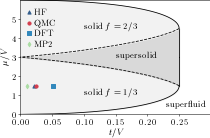

In [3]:
colors = ["#d43e4e", "#abdda4", "#3288bc", "#6a006a"]
cmap = plt.cm.get_cmap('viridis')
colors2 = [cmap(i*0.3) for i in range(4)]

plt.plot(PhaseDiagramDat[:,0], PhaseDiagramDat[:,1], color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], color = 'black', linewidth = 0.8, linestyle = "--")
plt.plot(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,0], -PhaseDiagramDat[:,1]+6, color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, color = 'black', linewidth = 0.8, linestyle = "--")
plt.plot(PhaseDiagramDat[:,4], -PhaseDiagramDat[:,5]+6, color = 'black', linewidth = 0.8)

ax = plt.gca()
#ax.set_facecolor("#f2f2f2")

plt.fill_between(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], 1.5, color = "#f2f2f2")
plt.fill_between(PhaseDiagramDat[:,2], 1.5, PhaseDiagramDat[:,3], color = "#f2f2f2")

plt.fill_between(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], -PhaseDiagramDat[:,3]+6, color = "#d9d9d9")

plt.fill_between(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, 4.5, color = "#f2f2f2")
plt.fill_between(PhaseDiagramDat[:,4], 4.5, -PhaseDiagramDat[:,5]+6, color = "#f2f2f2")

ax.scatter(0.021, 1.5, color = colors2[1], s = 10, label = "HF", marker = '^')
ax.scatter(0.025, 1.5, color = colors[0], s = 10, label = "QMC")
ax.scatter(0.051, 1.5, color = colors[2], s = 10, label = "DFT", marker = 's')
ax.scatter(0.011, 1.5, color = colors[1], s = 10, label = "MP2", marker = 'd')

plt.legend()

plt.text(0.23,0.4, 'superfluid')
plt.text(0.15,3, 'supersolid')
plt.text(0.1,1.0, r'solid $f = 1/3$')
plt.text(0.1,4.5, r'solid $f = 2/3$')

plt.xlim(0, 0.299)
plt.ylim(0, 5.999)

plt.xlabel(r'$t/V$')
plt.ylabel(r'$\mu/V$')

plt.savefig('../plots/phase_diagram.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
plt.savefig('../plots/phase_diagram.svg', bbox_inches ='tight') 
plt.show()